**Capstone Project on COVID19 prediction**

**Introduction**

The COVID-19 pandemic has presented an unprecedented challenge to global healthcare systems, underscoring the critical need for accurate and efficient diagnosis. Rapid and reliable identification of individuals infected with the SARS-CoV-2 virus is paramount for effective public health management, timely treatment, and resource allocation. In this context, the utilization of machine learning techniques offers a promising avenue for enhancing the diagnostic process.

This project focuses on leveraging machine learning algorithms to predict the likelihood of individuals testing positive for COVID-19 based on their presented symptoms. By analyzing a comprehensive dataset collected during a specific timeframe, encompassing various symptoms and demographic information, we aim to develop models capable of aiding medical professionals in making timely and accurate diagnoses.



**Attribute Descriptions**

The following list describes each of the dataset’s features used by the model:


A. Basic information:

1. ID (Individual ID)

2. Sex (male/female).

3. Age ≥60 above years (true/false)

4. Test date (date when tested for COVID)


B. Symptoms:

5. Cough (true/false).

6. Fever (true/false).

7. Sore throat (true/false).

8. Shortness of breath (true/false).

9. Headache (true/false).


C. Other information:

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

# **Questions to Answer**
1. **Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**
   
   The proposal holds paramount importance in the current global scenario dominated by the COVID-19 pandemic. Accurate disease prediction is pivotal for several reasons:
   
   - **Timely Intervention:** Early prediction allows for prompt medical intervention, reducing the severity of cases and improving patient outcomes.
   
   - **Resource Allocation:** Efficient prediction models assist in allocating medical resources judiciously, ensuring that critical resources are directed toward those who are more likely to test positive.
   
   - **Preventive Measures:** Accurate predictions enable the implementation of preventive measures, such as targeted quarantines and contact tracing, which are crucial in curbing the spread of the virus.
   
   - **Reducing Transmission:** Identifying and isolating positive cases promptly contributes to breaking the transmission chain and protecting vulnerable populations.

2. **How is it going to impact the medical field when it comes to effective screening and reducing health care burden?**

   - **Optimized Screening:** The proposal aims to enhance the screening process by incorporating machine learning models, leading to more targeted and efficient testing protocols.
   
   - **Healthcare Resource Management:** Accurate predictions aid in managing healthcare resources effectively, preventing overload, and ensuring that medical facilities are equipped to handle the demand.
   
   - **Cost-Efficiency:** Targeted screening and resource management contribute to cost-efficiency in the healthcare system, making optimal use of available resources.

3. **If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease.**

   - **Versatility of Models:** The proposed machine learning models are designed to be adaptable. While initially focused on COVID-19, the methodologies can be extended and modified for other infectious diseases, providing a versatile framework for future healthcare challenges.
   
   - **Knowledge Transferability:** Insights gained from this project can be applied to understand the predictive dynamics of other diseases, addressing commonalities in symptomatology, transmission patterns, and demographic factors.

These questions lay the foundation for a comprehensive exploration of the proposal's significance, emphasizing its potential impact on medical practices, resource allocation, and future adaptability.

---

# **Here I am using ML Approach to solve the problem.**

In [265]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [266]:
data = pd.read_csv("corona_tested_006.csv")
df=data.copy()

In [267]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [268]:
df.shape

(278848, 11)

In [269]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [270]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [271]:
df.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [272]:
df.describe(include="all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
df.isnull()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,False,False,False
278844,False,False,False,False,False,False,False,False,False,False,False
278845,False,False,False,False,False,False,False,False,False,False,False
278846,False,False,False,False,False,False,False,False,False,False,False


In [274]:
# find out the null values
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [276]:
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [277]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [278]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [279]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [280]:
df.drop_duplicates()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [281]:
import missingno as msno

<Axes: >

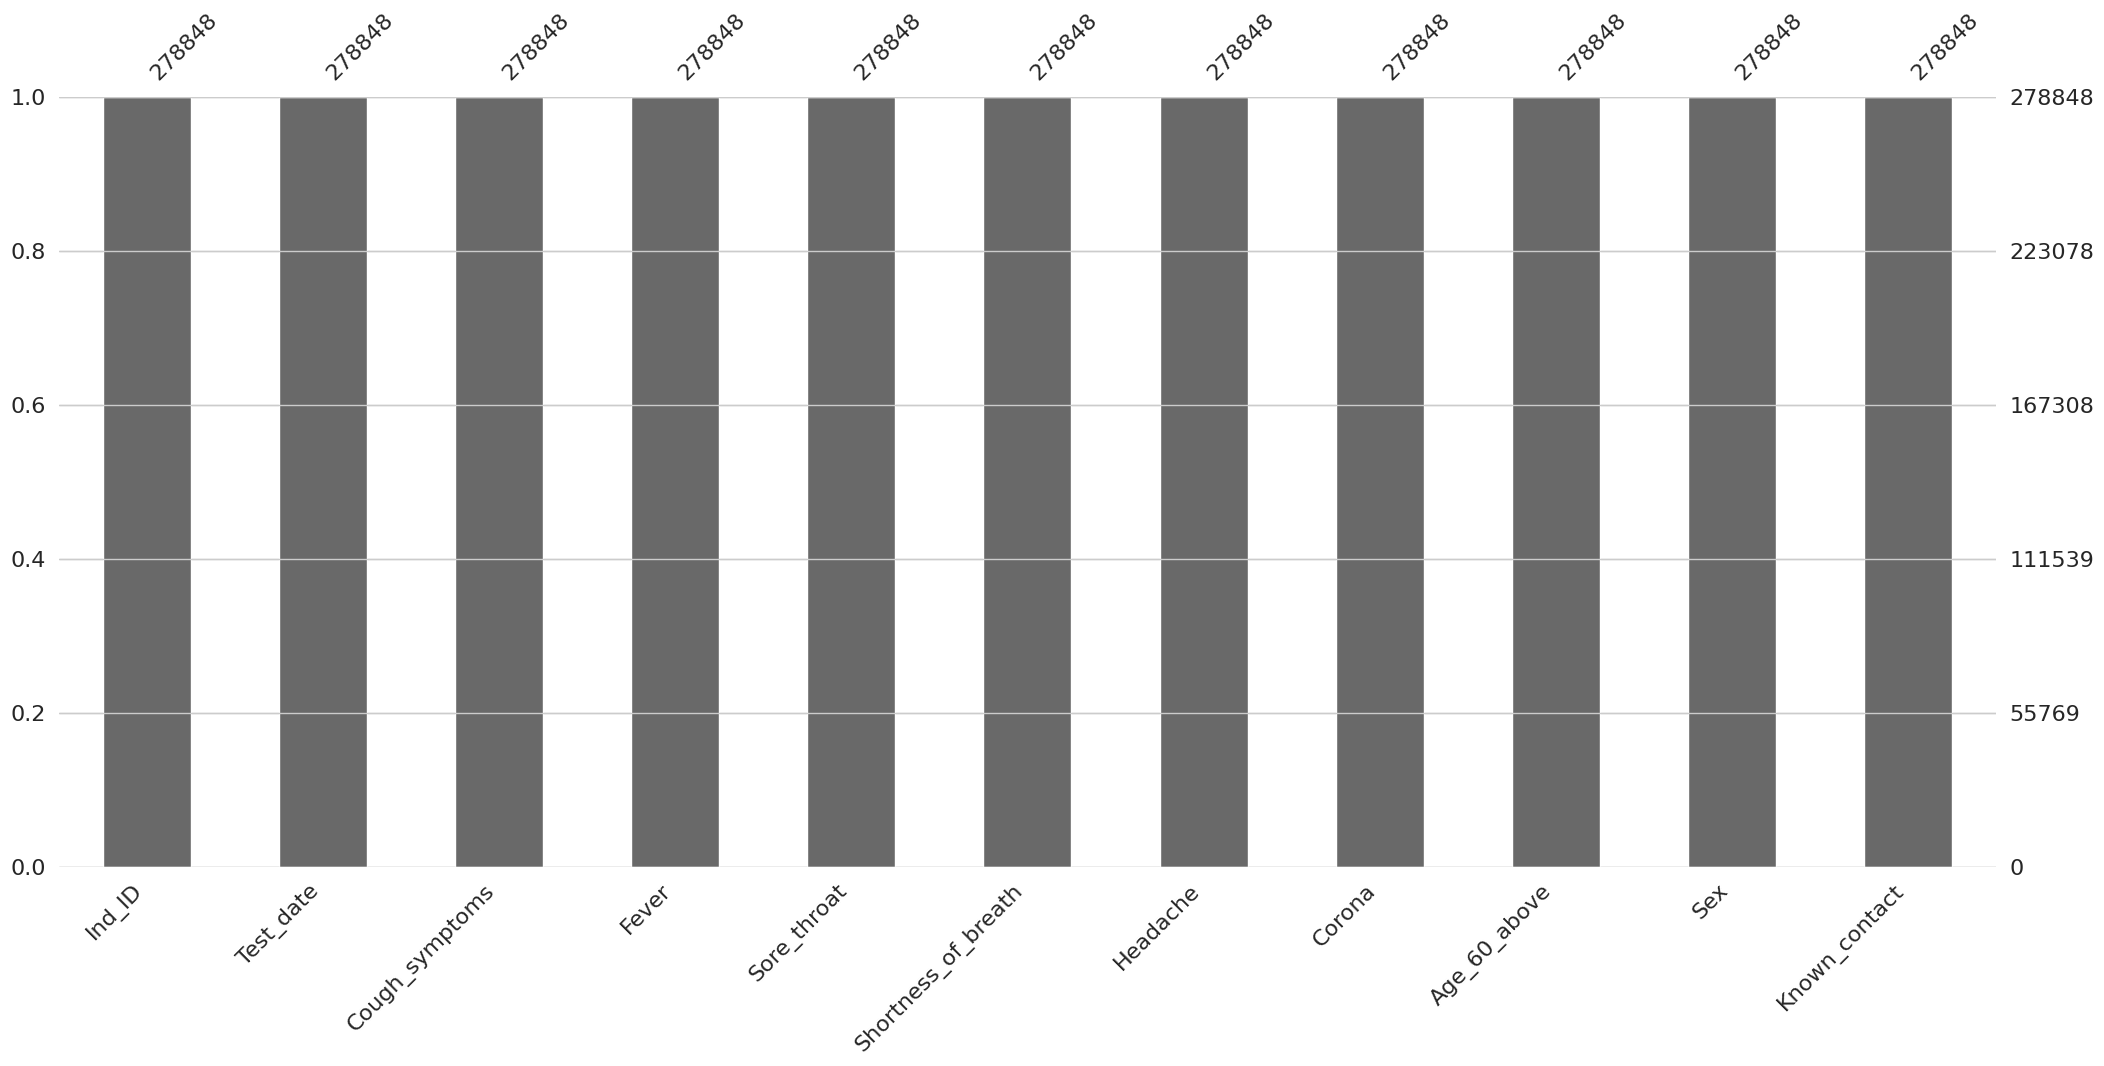

In [282]:
msno.bar(df)

In [283]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# finding the null values.
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

# Visualizations

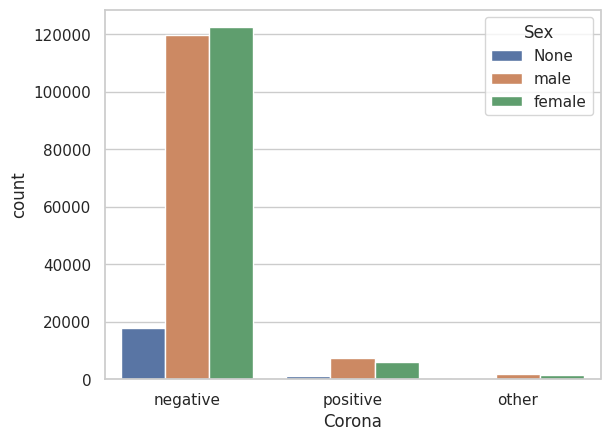

In [285]:
sns.countplot(df, hue = 'Sex', x = df['Corona'])
sns.set(style='whitegrid')

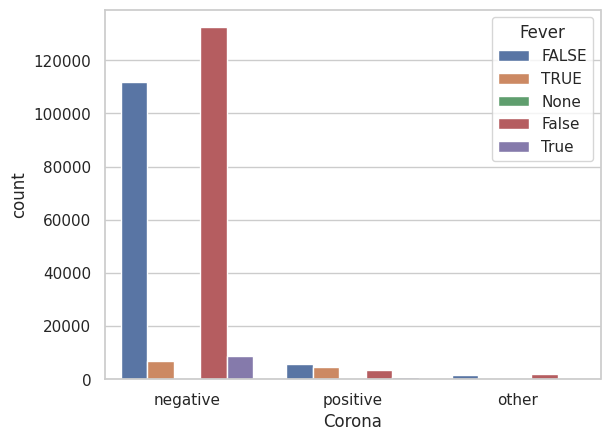

In [286]:
sns.countplot(df, x = df['Corona'],hue='Fever')
sns.set(style='whitegrid')

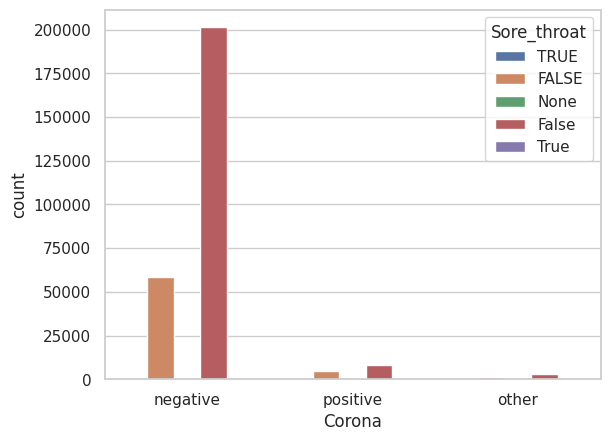

In [287]:
sns.countplot(df, x = df['Corona'],hue='Sore_throat')
sns.set(style='whitegrid')

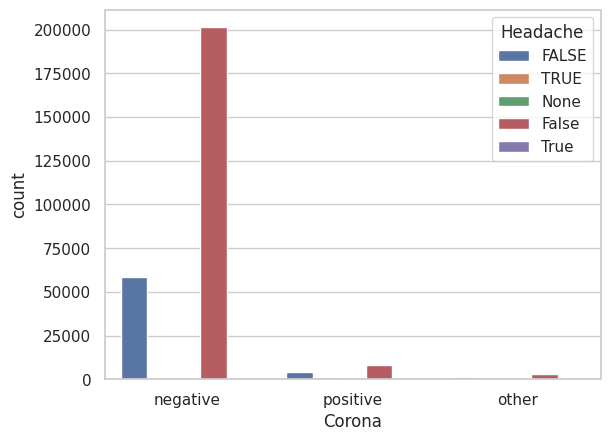

In [288]:
sns.countplot(df, x = df['Corona'],hue='Headache')
sns.set(style='whitegrid')


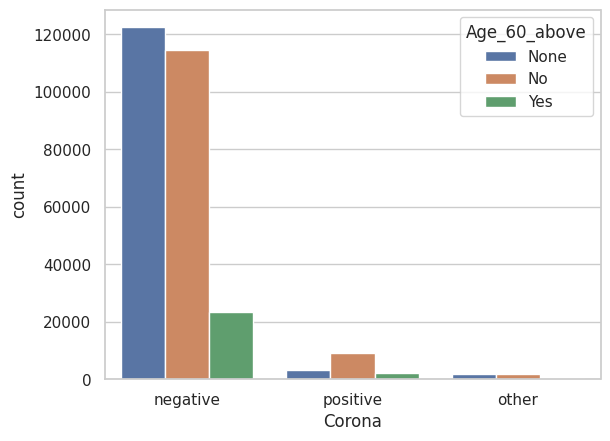

In [289]:
sns.countplot(df, x = df['Corona'],hue='Age_60_above')
sns.set(style='whitegrid')

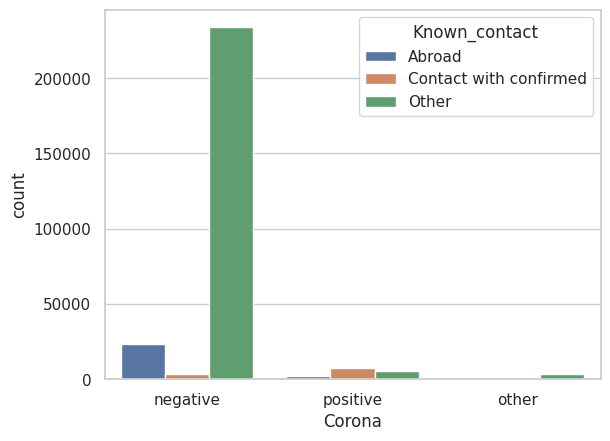

In [290]:
sns.countplot(df, x = df['Corona'],hue='Known_contact')
sns.set(style='whitegrid')

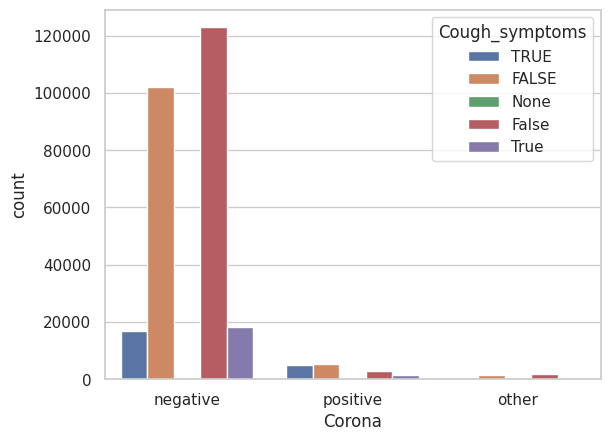

In [291]:
sns.countplot(df, x = df['Corona'],hue='Cough_symptoms')
sns.set(style='whitegrid')

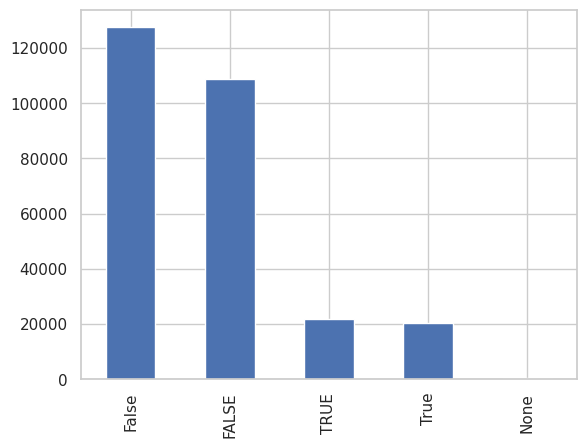

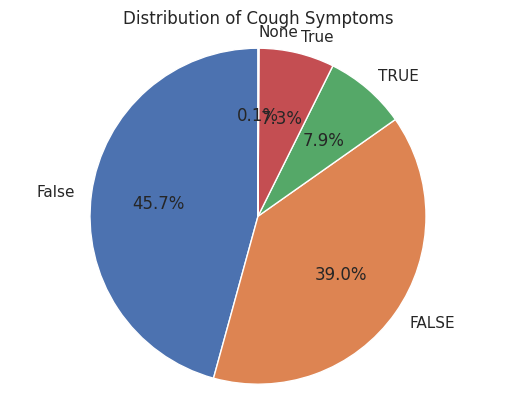

In [292]:
# Create a bar chart of the data
df['Cough_symptoms'].value_counts().plot.bar()

# Display the chart
plt.show()
# Count number of TRUE, FALSE cases
Cough_symptoms_count = df['Cough_symptoms'].value_counts()

# Create a pie chart
plt.pie(Cough_symptoms_count, labels=Cough_symptoms_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Cough Symptoms')
plt.show()

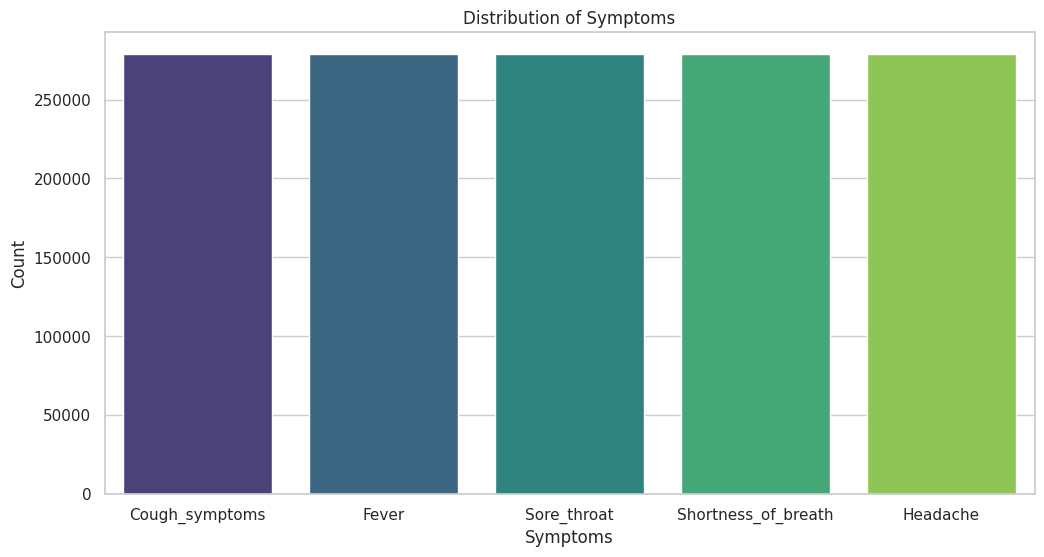

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your boolean columns are indeed boolean
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
df[boolean_columns] = df[boolean_columns].astype(bool)

# Select relevant columns for symptoms
symptoms_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Plot a bar chart for the distribution of symptoms
plt.figure(figsize=(12, 6))
sns.countplot(data=df[symptoms_columns], palette='viridis')
plt.title('Distribution of Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()


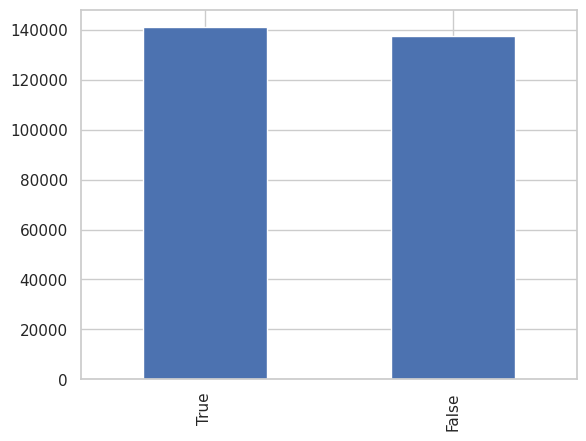

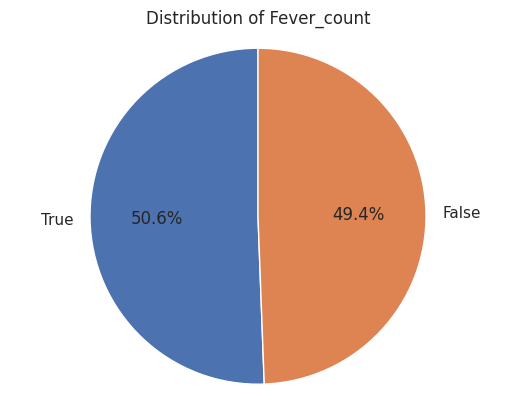

In [294]:
# Create a bar chart of the data
df['Fever'].value_counts().plot.bar()

# Display the chart
plt.show()
# Count number of TRUE, FALSE, and None cases
Fever_count = df['Fever'].value_counts()

# Create a pie chart
plt.pie(Fever_count, labels=Fever_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Fever_count')
plt.show()

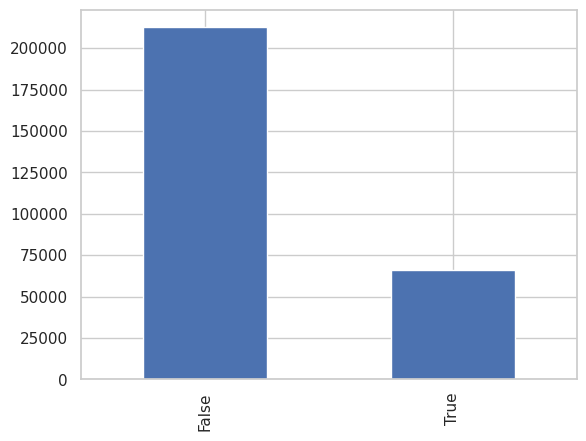

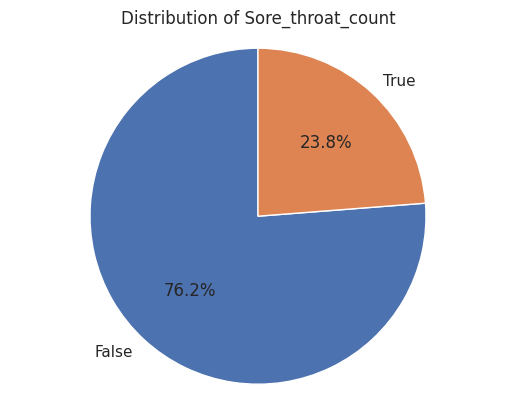

In [295]:
# Create a bar chart of the data
df['Sore_throat'].value_counts().plot.bar()

# Display the chart
plt.show()
# Count number of TRUE, FALSE cases
Sore_throat_count = df['Sore_throat'].value_counts()

# Create a pie chart
plt.pie(Sore_throat_count, labels=Sore_throat_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Sore_throat_count')
plt.show()

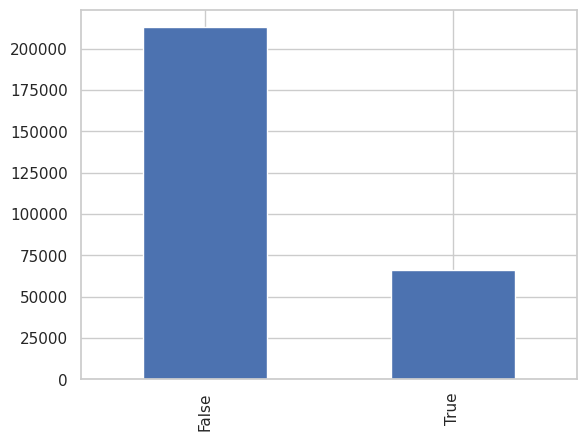

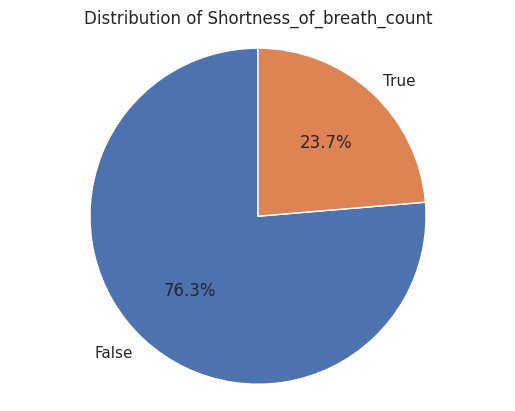

In [296]:
# Create a bar chart of the data
df['Shortness_of_breath'].value_counts().plot.bar()

# Display the chart
plt.show()
# Count number of TRUE, FALSE cases
Shortness_of_breath_count = df['Shortness_of_breath'].value_counts()

# Create a pie chart
plt.pie(Shortness_of_breath_count, labels=Shortness_of_breath_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Shortness_of_breath_count')
plt.show()

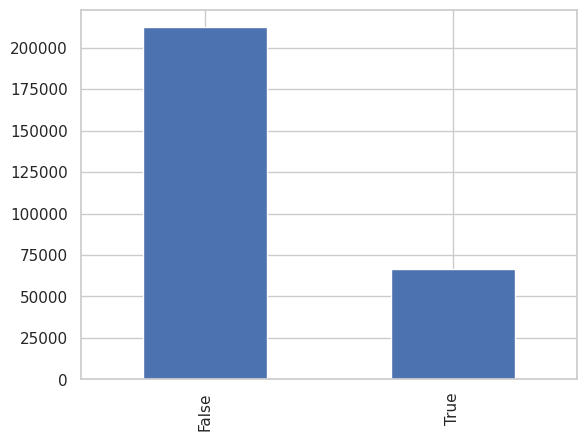

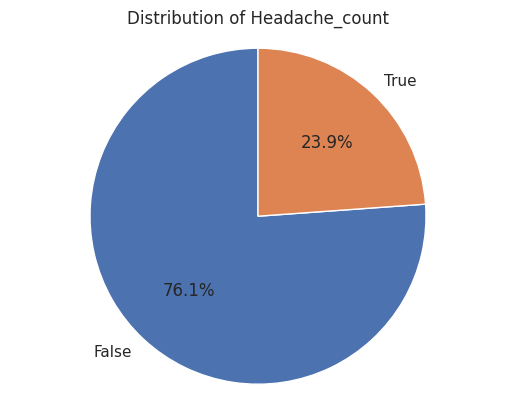

In [297]:
# Create a bar chart of the data
df['Headache'].value_counts().plot.bar()

# Display the chart
plt.show()
# Count number of TRUE, FALSE cases
Headache_count = df['Headache'].value_counts()

# Create a pie chart
plt.pie(Headache_count, labels=Headache_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Headache_count')
plt.show()

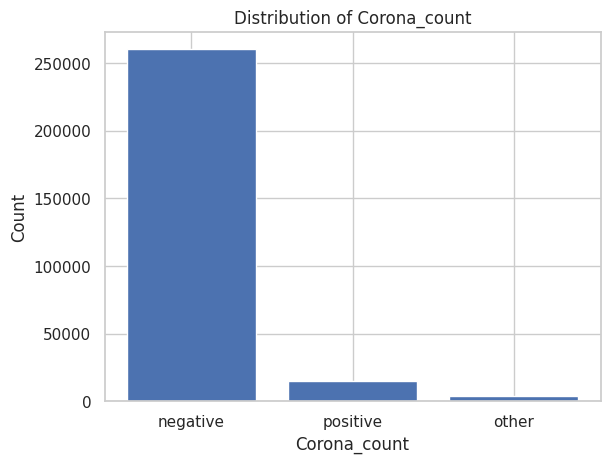

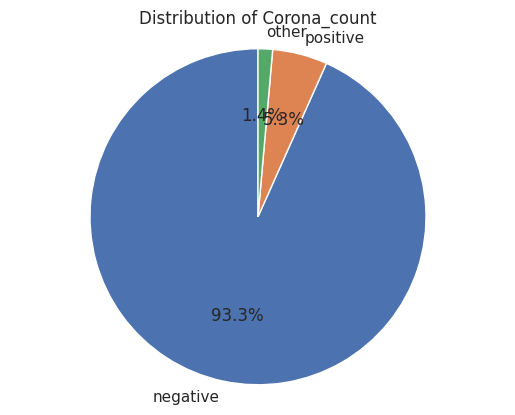

In [298]:
# count number of negative and positive cases
Corona_count=df['Corona'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Corona_count.index,Corona_count.values)
plt.xlabel('Corona_count')
plt.ylabel('Count')
plt.title('Distribution of Corona_count')
plt.show()

# Create a pie chart
plt.pie(Corona_count, labels=Corona_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Corona_count')
plt.show()

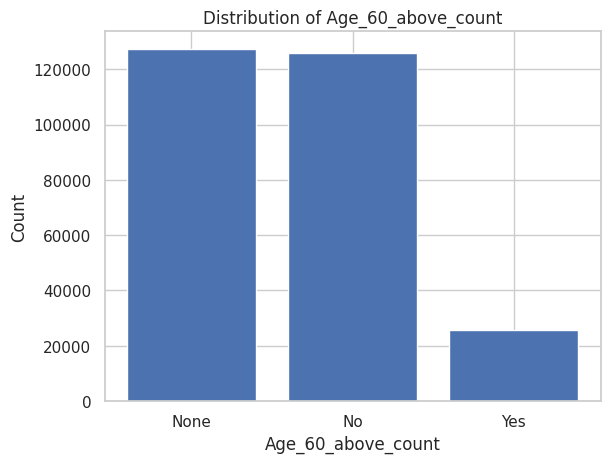

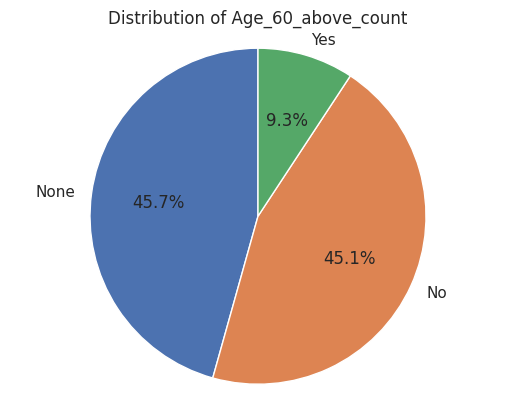

In [299]:
# count number of Age_60_above
Age_60_above_count=df['Age_60_above'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Age_60_above_count.index,Age_60_above_count.values)
plt.xlabel('Age_60_above_count')
plt.ylabel('Count')
plt.title('Distribution of Age_60_above_count')
plt.show()

# Create a pie chart
plt.pie(Age_60_above_count, labels=Age_60_above_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Age_60_above_count')
plt.show()

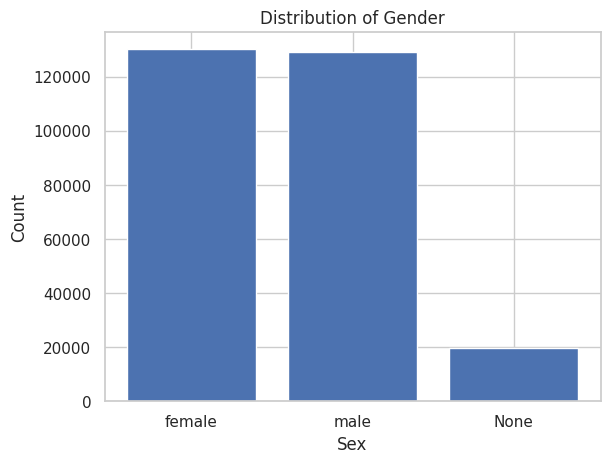

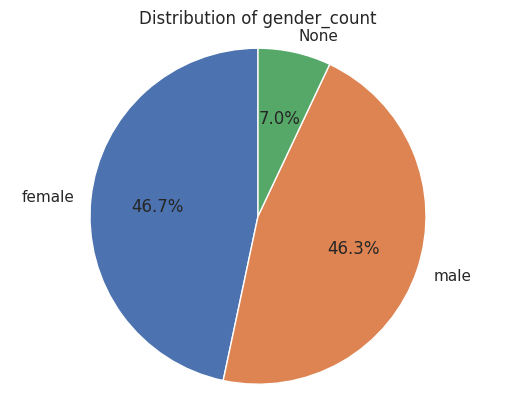

In [300]:
# count number of males and females
gender_count=df['Sex'].value_counts()
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of gender_count')
plt.show()

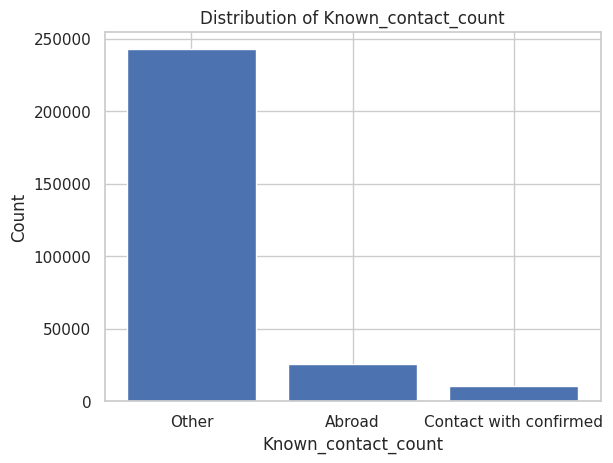

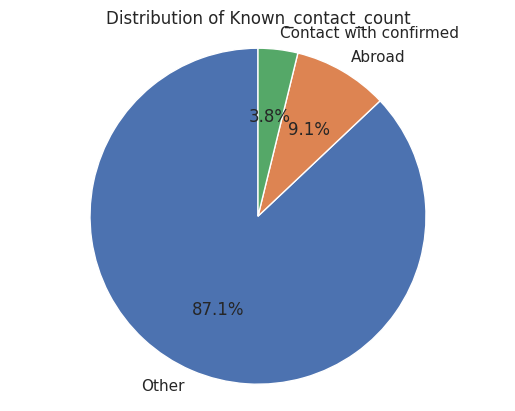

In [301]:
# count number of Known_contact
Known_contact_count=df['Known_contact'].value_counts()
#creat barpolt using Matplotlib
plt.bar(Known_contact_count.index,Known_contact_count.values)
plt.xlabel('Known_contact_count')
plt.ylabel('Count')
plt.title('Distribution of Known_contact_count')
plt.show()

# Create a pie chart
plt.pie(Known_contact_count, labels=Known_contact_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of Known_contact_count')
plt.show()

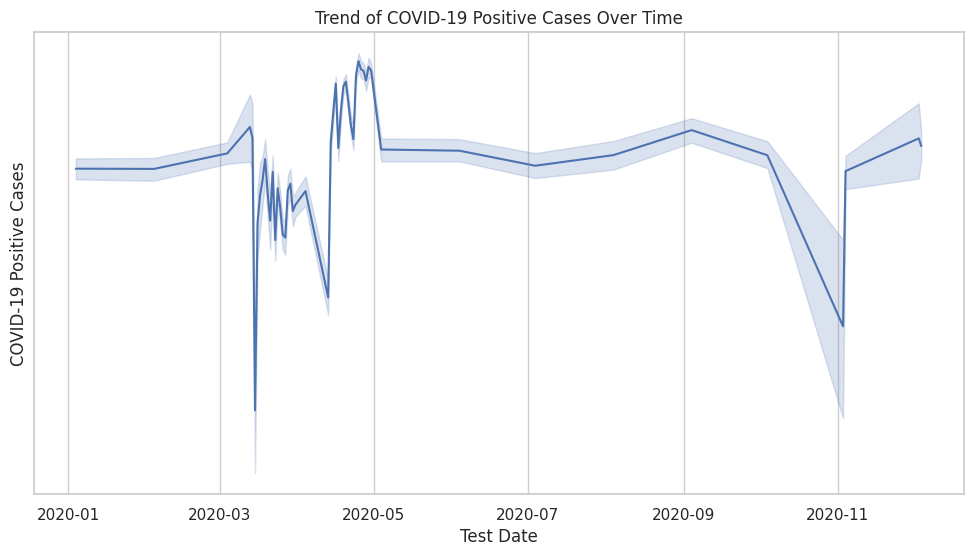

In [302]:
# Make sure to convert 'Test_date' to datetime format

df['Test_date'] = pd.to_datetime(df['Test_date'])

# Plot the trend of COVID-19 positive cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Test_date', y='Corona', data=df)
plt.title('Trend of COVID-19 Positive Cases Over Time')
plt.xlabel('Test Date')
plt.ylabel('COVID-19 Positive Cases')
plt.show()


In [303]:
df.to_csv("final_project.csv")

In [304]:
df.head(2)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,True,True,True,True,True,negative,None,None,Abroad
1,2,2020-11-03,True,True,True,True,True,positive,None,None,Abroad


**Relation between categorical variables**

In [305]:
# Find out the correlation between variables using spearman rank correlation
df2 = df.corr(method='spearman')
df2

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
Ind_ID,1.000000,-0.775975,-0.816299,-0.734473,-0.734436,-0.734661
Cough_symptoms,-0.775975,1.000000,0.886961,0.512027,0.510972,0.513202
Fever,-0.816299,0.886961,1.000000,0.550913,0.549942,0.552441
Sore_throat,-0.734473,0.512027,0.550913,1.000000,0.990568,0.988972
Shortness_of_breath,-0.734436,0.510972,0.549942,0.990568,1.000000,0.988769
Headache,-0.734661,0.513202,0.552441,0.988972,0.988769,1.000000


<Axes: >

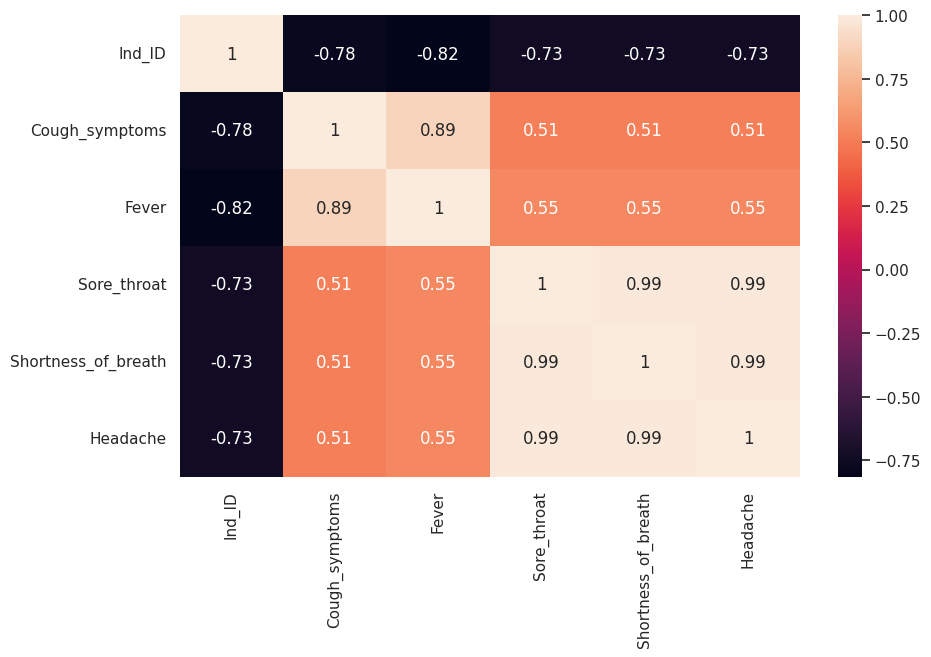

In [306]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df2,annot=True)

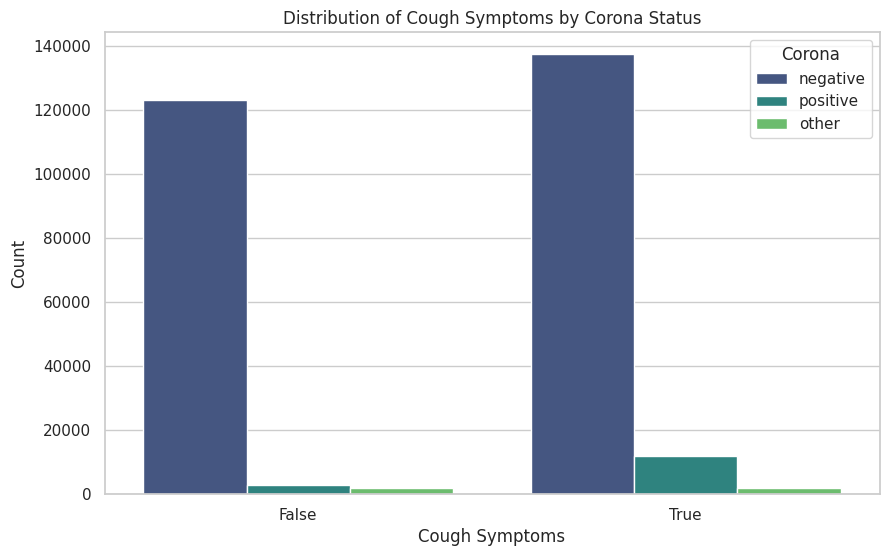

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your boolean columns are indeed boolean
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
df[boolean_columns] = df[boolean_columns].astype(bool)

# Plot a count plot for the distribution of 'Cough_symptoms' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Cough_symptoms', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Cough Symptoms by Corona Status')
plt.xlabel('Cough Symptoms')
plt.ylabel('Count')
plt.show()


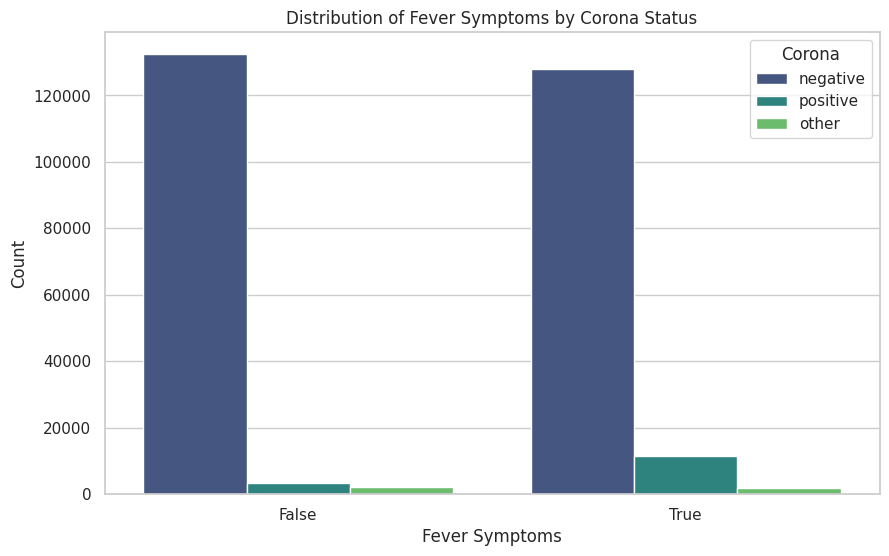

In [308]:
# Plot a count plot for the distribution of 'Fever' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Fever', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Fever Symptoms by Corona Status')
plt.xlabel('Fever Symptoms')
plt.ylabel('Count')
plt.show()

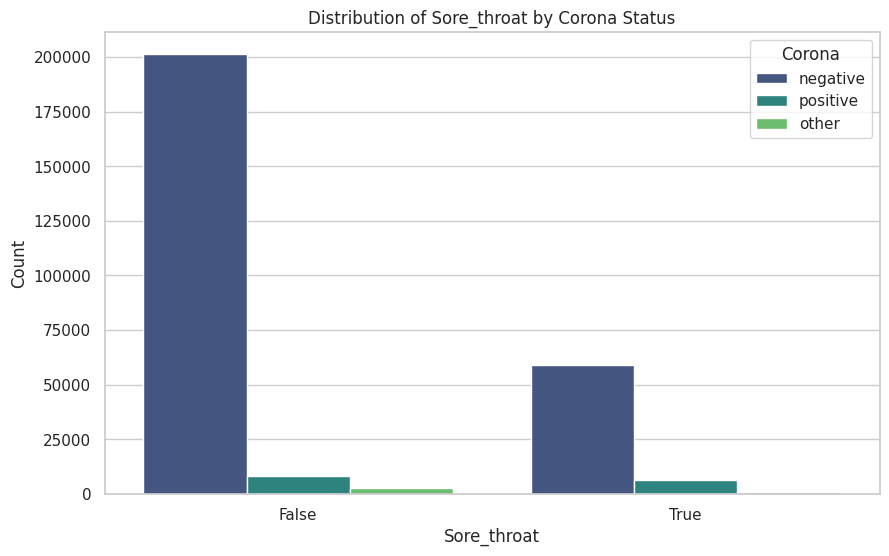

In [309]:
# Plot a count plot for the distribution of 'Sore_throat' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sore_throat', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Sore_throat by Corona Status')
plt.xlabel('Sore_throat')
plt.ylabel('Count')
plt.show()

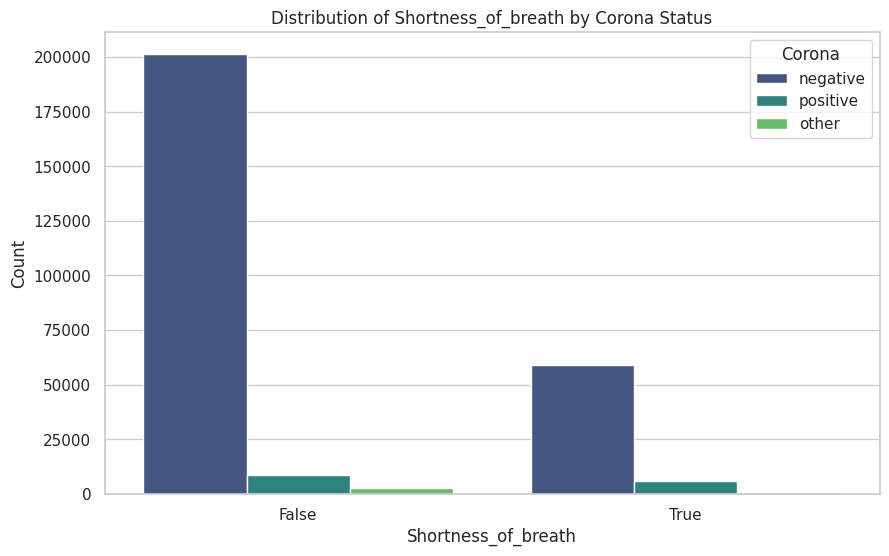

In [310]:
# Plot a count plot for the distribution of 'Shortness_of_breath' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Shortness_of_breath', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Shortness_of_breath by Corona Status')
plt.xlabel('Shortness_of_breath')
plt.ylabel('Count')
plt.show()

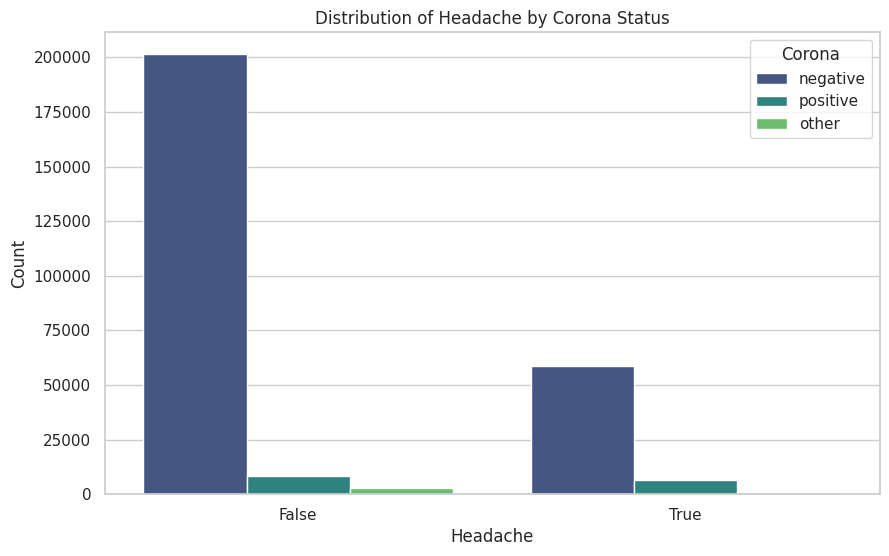

In [311]:
# Plot a count plot for the distribution of 'Headache' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Headache', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Headache by Corona Status')
plt.xlabel('Headache')
plt.ylabel('Count')
plt.show()

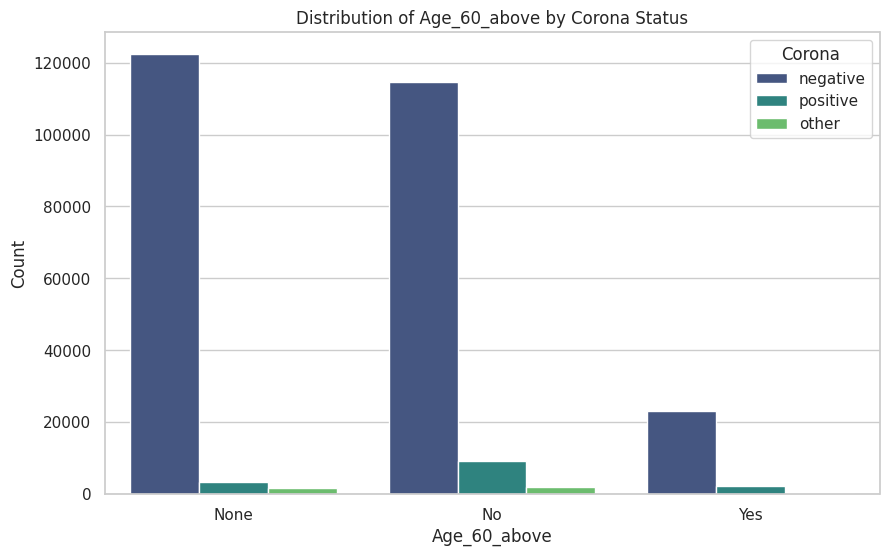

In [312]:
# Plot a count plot for the distribution of 'Age_60_above' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_60_above', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Age_60_above by Corona Status')
plt.xlabel('Age_60_above')
plt.ylabel('Count')
plt.show()

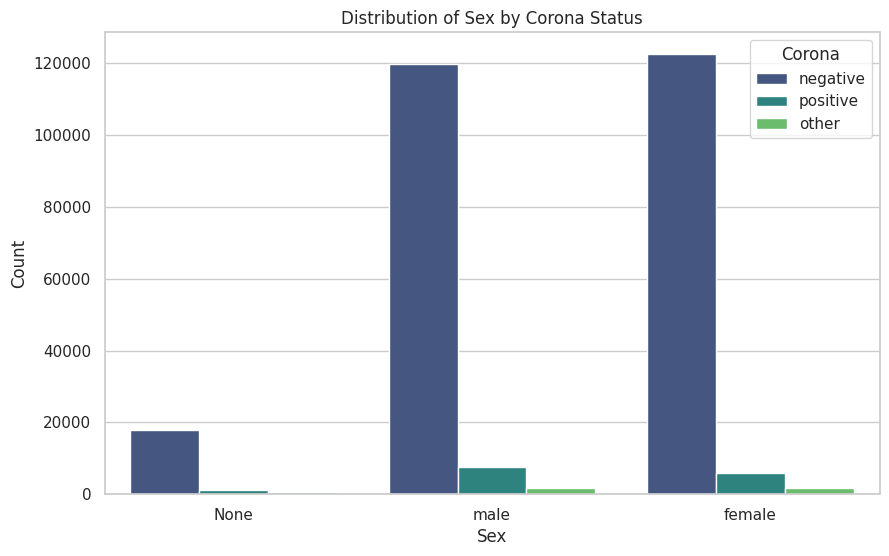

In [313]:
# Plot a count plot for the distribution of 'Sex' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Sex by Corona Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

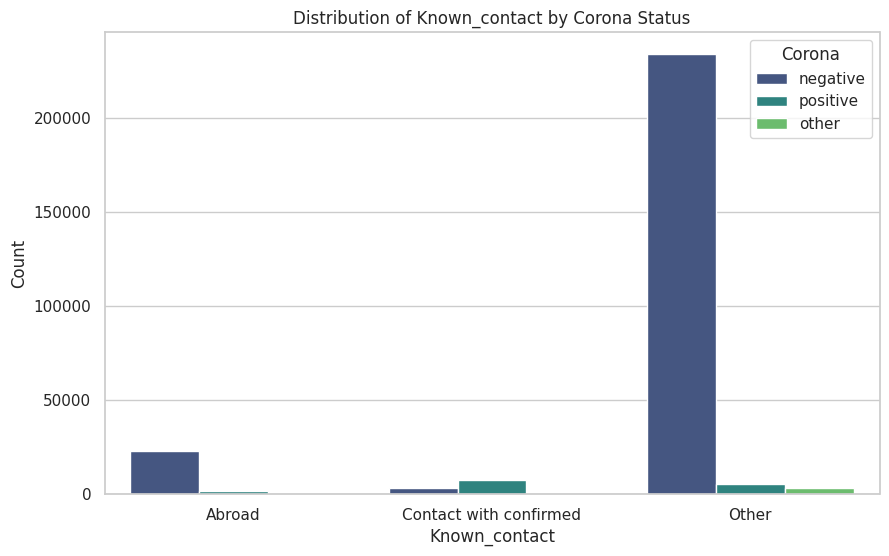

In [314]:
# Plot a count plot for the distribution of 'Known_contact' with hue='Corona'
plt.figure(figsize=(10, 6))
sns.countplot(x='Known_contact', hue='Corona', data=df, palette='viridis')
plt.title('Distribution of Known_contact by Corona Status')
plt.xlabel('Known_contact')
plt.ylabel('Count')
plt.show()

In [315]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,True,True,True,True,True,negative,None,None,Abroad
1,2,2020-11-03,True,True,True,True,True,positive,None,None,Abroad
2,3,2020-11-03,True,True,True,True,True,positive,None,None,Abroad
3,4,2020-11-03,True,True,True,True,True,negative,None,None,Abroad
4,5,2020-11-03,True,True,True,True,True,negative,None,None,Contact with confirmed


In [316]:
# removing unused columns
df=df.drop(['Ind_ID','Test_date'],axis=1)

In [317]:
df.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,True,True,True,True,negative,None,None,Abroad
1,True,True,True,True,True,positive,None,None,Abroad
2,True,True,True,True,True,positive,None,None,Abroad
3,True,True,True,True,True,negative,None,None,Abroad
4,True,True,True,True,True,negative,None,None,Contact with confirmed


# **Feature Engineering**

In [318]:
from sklearn.preprocessing import LabelEncoder
# Define the custom mappings
custom_mappings = {
    'Cough_symptoms': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Fever': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Sore_throat': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Shortness_of_breath': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Headache': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Corona': {'negative': 0, 'positive': 1, 'None': -1},
    'Age_60_above': {'None': -1, 'No': 0, 'Yes': 1},
    'Sex': {'None': -1, 'male': 1, 'female': 2},
    'Known_contact': {'Abroad': 1, 'Contact with confirmed': 2, 'Other': 3, 'None': -1}
}

# Apply label encoding with custom mappings
for column, mappings in custom_mappings.items():
    le = LabelEncoder()
    df[column] = df[column].map(mappings).fillna(-1)  # Using -1 as a placeholder for missing or unknown values in the label encoding process should not have a significant impact on data modeling, as long as you handle it appropriately in your modeling pipeline.

# Print the updated dataset
print(df)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                 -1.0   -1.0         -1.0                 -1.0      -1.0   
1                 -1.0   -1.0         -1.0                 -1.0      -1.0   
2                 -1.0   -1.0         -1.0                 -1.0      -1.0   
3                 -1.0   -1.0         -1.0                 -1.0      -1.0   
4                 -1.0   -1.0         -1.0                 -1.0      -1.0   
...                ...    ...          ...                  ...       ...   
278843            -1.0   -1.0         -1.0                 -1.0      -1.0   
278844            -1.0   -1.0         -1.0                 -1.0      -1.0   
278845            -1.0   -1.0         -1.0                 -1.0      -1.0   
278846            -1.0   -1.0         -1.0                 -1.0      -1.0   
278847            -1.0   -1.0         -1.0                 -1.0      -1.0   

        Corona  Age_60_above  Sex  Known_contact  
0          0.0          

In [319]:
# Calculate total count and percentage of each category for categorical features
categorical_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']

for feature in categorical_features:
    feature_count = df[feature].value_counts()
    total_count = len(df)
    percentages = feature_count / total_count * 100

    print(f"\nCharacteristic of feature '{feature}':")
    print("-------------------------------")
    print("Category\tCount\tPercentage")
    print("-------------------------------")
    for category, count in feature_count.items():
        percentage = percentages[category]
        print(f"{category}\t{count}\t{percentage:.2f}%")


Characteristic of feature 'Cough_symptoms':
-------------------------------
Category	Count	Percentage
-------------------------------
-1.0	278848	100.00%

Characteristic of feature 'Fever':
-------------------------------
Category	Count	Percentage
-------------------------------
-1.0	278848	100.00%

Characteristic of feature 'Sore_throat':
-------------------------------
Category	Count	Percentage
-------------------------------
-1.0	278848	100.00%

Characteristic of feature 'Shortness_of_breath':
-------------------------------
Category	Count	Percentage
-------------------------------
-1.0	278848	100.00%

Characteristic of feature 'Headache':
-------------------------------
Category	Count	Percentage
-------------------------------
-1.0	278848	100.00%

Characteristic of feature 'Corona':
-------------------------------
Category	Count	Percentage
-------------------------------
0.0	260227	93.32%
1.0	14729	5.28%
-1.0	3892	1.40%

Characteristic of feature 'Age_60_above':
------------------

**Model Building**

In [320]:
 from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = df.drop('Corona', axis=1)
y = df['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Split the data into training and testing sets
X = df.drop('Corona', axis=1)
y = df['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Create a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate all the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Model: Random Forest
Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.94

Model: Logistic Regression
Accuracy: 0.93
Precision: 0.87
Recall: 0.93
F1 Score: 0.90

Model: SVM
Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.94

Model: K-Nearest Neighbors
Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.94

Model: Naive Bayes
Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.88

Model: Decision Tree
Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.94


Random Forest, SVM , K-Nearest Neighbors, Decision Tree are the best performing models with 95% accuracy rate. We are able to predict COVID 19 with an accuracy of 95%.

**Conculsion**:

The number of people who got Covid test report as negitve is higher than the number of people who got Covid test report as positve
The sum of positively reported male people number is higher than female
The number of negtively reported people who got fever is lesser than The number of negtively reported people who did not get fever. And the people who got fever or not are postively reported for Covid-19 is almost equal in number. So that, fever is not considerable symptom actually in case of covid.
The number of positvely reported people who got sore_troat is very less as compared to the number of positvely reported people who did not get sore_troat and the number of negtively reported people who did not sore_troat. So that, sore_troat is also not considerable symptom for Covid-19.
The reporting of symptom headache is similar to sore_troat,
The reporting of Age_60_above is similar to sore_troat
The one known_contact who got confirmed for positively reported people is heigher than other, so that feture known_contract with comformed persons is considerable
The number of postively reported people who has symptom cough or not is alomost equal and other hand the number of negtively reported people who got cough is heigher than the number of positively reported people
Therefore, the positevly reported people with smytoms are less compared to the negtively reported people with symptoms.

These symptoms are not acceptable to predict Covid-19 except the Cough symptom.

# **SQL Queries**

Loading cleaned data as cdf

In [322]:
cdf=pd.read_csv('final_project.csv')

In [323]:
import duckdb #importing neccesaary libraries for sql
conn=duckdb.connect()

In [324]:
conn.register("cdf",cdf) #registering cdf

In [325]:
conn.execute("select * from cdf").fetchdf()

,Unnamed: 0,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,0,1,2020-11-03,True,True,True,True,True,negative,None,None,Abroad
1,1,2,2020-11-03,True,True,True,True,True,positive,None,None,Abroad
2,2,3,2020-11-03,True,True,True,True,True,positive,None,None,Abroad
3,3,4,2020-11-03,True,True,True,True,True,negative,None,None,Abroad
4,4,5,2020-11-03,True,True,True,True,True,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278843,278844,2020-04-30,False,False,False,False,False,positive,None,male,Other
278844,278844,278845,2020-04-30,False,False,False,False,False,negative,None,female,Other
278845,278845,278846,2020-04-30,False,False,False,False,False,negative,None,male,Other
278846,278846,278847,2020-04-30,False,False,False,False,False,negative,None,male,Other


In [326]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00


In [327]:
!pip install -q pandasql

import pandasql as psql

  Preparing metadata (setup.py) ... done


1. Find the number of corona patients who faced shortness of breath.

In [334]:
conn.execute("SELECT COUNT(*) AS num_corona_shortness_of_breath FROM cdf WHERE Corona = 'positive' AND Shortness_of_breath = 'True'").fetchdf()

,num_corona_shortness_of_breath
0,6085


2. Find the number of negative corona patients who have fever and sore_throat.

In [335]:
conn.execute("SELECT COUNT(*) AS num_negative_corona_fever_sore_throat FROM cdf WHERE Corona = 'negative' AND Fever = 'TRUE' AND Sore_throat = 'TRUE'").fetchdf()

,num_negative_corona_fever_sore_throat
0,58854


3. Group the data by month and rank the number of positive cases.

In [339]:
conn.execute("WITH MonthlyPositiveCounts AS ( SELECT MONTH(CAST(Test_date AS DATE)) AS Month, COUNT(*) AS Positive_Count FROM cdf WHERE Corona = 'positive' GROUP BY MONTH(CAST(Test_date AS DATE))) SELECT Month, Positive_Count, RANK() OVER (ORDER BY Positive_Count DESC) AS Rank FROM MonthlyPositiveCounts").fetchdf()

,Month,Positive_Count,Rank
0,3,6283,1
1,4,4188,2
2,1,682,3
3,2,615,4
4,5,505,5
5,7,483,6
6,6,394,7
7,10,356,8
8,11,331,9
9,12,330,10


4. Find the female negative corona patients who faced cough and headache.

In [342]:
conn.execute("SELECT COUNT(*) AS num_female_negative_corona_cough_headache FROM cdf WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = 'True' AND Headache = 'True'").fetchdf()

,num_female_negative_corona_cough_headache
0,23189


5. How many elderly corona patients have faced breathing problems?

In [351]:
conn.execute("SELECT COUNT(*) AS num_elderly_corona_breathing_problems FROM cdf WHERE Corona = 'positive' AND Age_60_above = 'Yes' AND Shortness_of_breath = 'True'").fetchdf()

,num_elderly_corona_breathing_problems
0,1140


6. Which three symptoms were more common among COVID positive patients?

In [345]:
conn.execute("WITH SymptomCounts AS (SELECT CAST(Cough_symptoms AS INT) AS Cough, CAST(Fever AS INT) AS Fever, CAST(Sore_throat AS INT) AS Sore_throat, CAST(Shortness_of_breath AS INT) AS Shortness_of_breath, CAST(Headache AS INT) AS Headache, COUNT(*) AS Count FROM cdf WHERE Corona = 'positive' GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache) SELECT 'Cough_symptoms' AS Symptom, SUM(Cough * Count) AS TotalCount FROM SymptomCounts UNION SELECT 'Fever' AS Symptom, SUM(Fever * Count) AS TotalCount FROM SymptomCounts UNION SELECT 'Sore_throat' AS Symptom, SUM(Sore_throat * Count) AS TotalCount FROM SymptomCounts UNION SELECT 'Shortness_of_breath' AS Symptom, SUM(Shortness_of_breath * Count) AS TotalCount FROM SymptomCounts UNION SELECT 'Headache' AS Symptom, SUM(Headache * Count) AS TotalCount FROM SymptomCounts ORDER BY TotalCount DESC LIMIT 3;").fetchdf()

,Symptom,TotalCount
0,Cough_symptoms,11990.0
1,Fever,11399.0
2,Headache,6592.0


7. Which symptom was less common among COVID negative people?

In [347]:
conn.execute("SELECT 'Cough_symptoms' AS Symptom, SUM(CAST(Cough_symptoms AS INT)) AS NegativeCount FROM cdf WHERE Corona = 'negative' UNION SELECT 'Fever' AS Symptom, SUM(CAST(Fever AS INT)) AS NegativeCount FROM cdf WHERE Corona = 'negative' UNION SELECT 'Sore_throat' AS Symptom, SUM(CAST(Sore_throat AS INT)) AS NegativeCount FROM cdf WHERE Corona = 'negative' UNION SELECT 'Shortness_of_breath' AS Symptom, SUM(CAST(Shortness_of_breath AS INT)) AS NegativeCount FROM cdf WHERE Corona = 'negative' UNION SELECT 'Headache' AS Symptom, SUM(CAST(Headache AS INT)) AS NegativeCount FROM cdf WHERE Corona = 'negative' ORDER BY NegativeCount ASC LIMIT 1;").fetchdf()

,Symptom,NegativeCount
0,Shortness_of_breath,58849.0


8. What are the most common symptoms among COVID positive males whose known contact was abroad?

In [350]:
conn.execute("SELECT 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache' FROM cdf WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' GROUP BY 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache' ORDER BY COUNT(*) DESC LIMIT 1;").fetchdf()

,'Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'
0,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
